In [30]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import nltk # national language tool kit
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np  
import re
t = Okt()

In [31]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [32]:
# train_data불러오기
train = pd.read_csv("../../Data/lstm_170.csv")

In [33]:
results = set()
train.가사.str.split().apply(results.update)
vocab_size = len(results)
vocab_size

13115

In [34]:
# results

---
# happy 형태소 분리

In [36]:
기쁨 = [
'끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 아름다운 너와 나 그림을 그려갔어 모래 위 떨린 손끝으로 날 향해 웃어주는 입술 끝 모양과 저 달보다 사랑스러운 두 눈을 가진 네가 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 남은 내 모든 날을 너에게 다 줘도 안 아까워 이제서야 내가 사랑에 눈을 뜬 건 가봐 경험하지 못했고 믿기지 않는 일만 일어나고 있는 거 아니 5월에 피는 봄꽃 처럼 내 사랑도 피어나 부는 바람에 살며시 실어 보내 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 설레는 지금이 꿈이 아닌 걸 알잖아 난 더 바랄 게 없어 먼 훗날 내 생애 아주 작은 소리로 귓가에 말할 거야 내 곁에 머물러줘서 마음 다해 고맙다고 어떤 말로도 표현 못 할 내 인생의 전부였다고 이 순간 너를 꼭 안고 고백할게 언제나 우리 모든 날들과 별빛 아래 우리 그림자 제일로 특별하다고 길고 긴 겨울 끝을 지나 너의 앞에 서있는 지금 선명한 목소리로 널 사랑한다고 말할게',
'둘이 손잡고 걸을 때 마주 보며 또 웃을 때 사랑한다 말하지 않아도 알아 널 만나러 가는 길에 내 입가에 늘 환한 미소만이 흐르고 있어 사랑해 너를 사랑해 눈물 나도록 사랑해 저기 밤하늘의 별보다 보석보다 네가 더 소중해 얼마나 내가 얼마나 너를 사랑하는지 내 모든 걸 너에게 줄게 속상하고 힘이 들 때 열이 나고 아파할 때 옆에서 늘 힘이 돼준 사람 너야 집에 돌아오는 길에 내 귓가엔 늘 너의 음성만이 흐르고 있어 사랑해 너를 사랑해 눈물 나도록 사랑해 저기 밤하늘의 별보다 보석보다 네가 더 소중해 얼마나 내가 얼마나 너를 사랑하는지 내 모든 걸 너에게 줄게 세월 지나 많이 변했을 때 미운 나의 손을 잡아줄 사람 먼 훗날 아주 먼 훗날 우리 눈 감는 그날에 나를 사랑해 준 너에게 고맙다고 후회는 없다고 사랑해 나만의 사랑 다시 태어난대도 내 사랑은 너 하나뿐야 영원히 너를 사랑해',
'지금보다 내가 만약 좀 더 예쁜 모습으로 너의 귀에 들리게 더 예쁜 말투를 쓰면 우리 사이가 특별해질까 내 소원은 니 주위만 혼자 서성거리는 일 그만하고 싶은 거 하난데 이제는 나도 사랑 받고 싶은데 나를 바라봐 줘 낮과 밤이 되줘 늘 환하게 빛나는 너는 내 사랑 알지 못하지만 그래서 더 망설이지만 언젠가 너의 시선 속에 내가 드는 일이 기적처럼 일어날 때 다 줄게 내 거 다 너에게 어쩔 때는 내 마음이 너무 뜨겁기만 해서 부담될까 걱정돼 그러다 널 보면 또 바보처럼 웃고 있어 나를 바라봐 줘 낮과 밤이 되줘 늘 환하게 빛나는 너는 내 사랑 알지 못하지만 그래서 더 망설이지만 언젠가 너의 시선 속에 내가 드는 일이 기적처럼 일어날 때 다 줄게 내 거 다 너에게 선명하게 아직 기억해 처음 너를 보았던 그날 날 바라보는 네 눈빛에 갇혀서 움직일 수가 없던 그때 그 순간을 안 들키고 싶던 티 안 내고 싶던 너를 향한 내 마음 이젠 전부 다 표현하고 싶어 고민은 널 더 늦출 뿐야 용기 내 고백을 할 거야 네 앞에 설 거야 너 하나로 가득한 하루가 내게는 꿈보다 소중해 넌 평생 내 맘 모른대도.',
'눈 감고 찍은 사진 장난스런 표정 하나둘 셋 하고서 손가락 하트 둘이서 연습했던 시그니처 포즈 꽃받침 속 너와 나 빛나고 있어 오늘 뭐해 날씨도 좋은데 홍대 가서 커피나 마실래 연인들 많은 거리에 도란도란 너랑 걷고 싶은데 우리도 예쁜 커플옷 입고 같이 데이트할래 눈 감고 찍은 사진 장난스런 표정 하나둘 셋 하고서 손가락 하트 둘이서 연습했던 시그니처 포즈 꽃받침 속 너와 나 빛나고 있어 수줍었던 그대를 만난 지 이번 주말 벌써 1년이야 기념일마다 약속한 사진 들을 많이 갖고 싶어져 아직도 너랑 설레고 싶어 우리 데이트할래 눈 감고 찍은 사진 장난스런 표정 하나둘 셋 하고서 손가락 하트 둘이서 연습했던 시그니처 포즈 꽃받침 속 너와 나 빛나고 있어 그대를 사랑했던 모든 시간들이 하나부터 열까지 너무 소중해 우리가 약속했던 많은 나날들이 사진 속 우리처럼 빛나고 있어'
"Beautiful day 그대 하나하나 내게 왜 이리 설레죠 Beautiful day 아름다운 그대 내 마음 당신을 향하죠 Beautiful Wonderful Beautiful I'm in love 내 마음 왜 이리 떨리죠 Beautiful day 나는 오늘밤도 쉽게 잠들 수 없겠죠 가만히 있어도 자꾸 웃음이 나 생각이 나 자기 전에도 나 베개를 끌어안고 혼잣말을 해 그댄 뭘 좋아해요 그대 맘속에 난 어때요 그대 때문에 매일 내 하루는 Beautiful day 그대 하나하나 내게 왜 이리 설레죠 Beautiful day 아름다운 그대 내 마음 당신을 향하죠 Beautiful Wonderful Beautiful I'm in love 내 마음 왜 이리 떨리죠 Beautiful day 나는 오늘밤도 쉽게 잠들 수 없겠죠 멍하니 지내던 그 날 그 밤 그 때의 새벽 간절히 그대만 원하던 어린 순수함도 다 알아주길 기다려요 내 맘에 귀 기울여 주길 그댈 생각해 난 내일도 Beautiful day Wonderful day 세상이 너무 아름답죠 Beautiful day Wonderful day 그대와 나 우리가 되길 Beautiful day 그대 하나하나 내게 왜 이리 설레죠 Beautiful day 아름다운 그대 내 마음 당신을 향하죠 Beautiful Wonderful Beautiful I'm in love 내 마음 왜 이리 떨리죠 Beautiful day 나는 오늘밤도 쉽게 잠들 수 없겠죠",
'그대 눈을 바라보면 마음이 떨려요 이 모든 순간이 전부 꿈만 같아요 어느 날 내게로 다가와 운명이란 걸 알게 되었죠 Baby I love you 난 네가 필요해 And hold me 내 곁에 있어줄래 My only you 매일 걱정돼요 혹시 사라질까 봐 그댄 나의 사랑 Only you 내게 보였던 그 미소 다 너무 예뻐서 더 보고 싶어서 나를 달래고 있죠 한 번에 알아 본 사랑은 내 생에 오직 그대뿐이죠 Baby I love you 난 네가 필요해 And hold me 내 곁에 있어 줄래 My only you 매일 걱정돼요 혹시 사라질까 봐 그댄 나의 사랑 Only you 푸르고 짙은 계절이 찾아올 때 그대 나의 꽃이 되어 주기를 In my heart Baby I love you 나 너를 사랑해 Always love you 곁에 있어 줄래 My only you 매일 걱정돼요 혹시 사라질까 봐 그댄 나의 사랑 Only you',
'아무 말 없이 내게서 커져만 가는 게 아무래도 이대론 안 되겠어 어쩌다 내가 이렇게 네게 빠진 건지 이유를 나도 모르겠어 넌 왜 내게서 맴돌아 뭘 해도 신경 쓰이고 뭘 해도 궁금해지고 넌 왜 내게서 맴돌아 oh 어떡해 나 자꾸만 생각이나 말해 뭐해 말해 뭐해 이러다가 바보처럼 한 눈 팔게 하지 말고 말해볼래 말해볼래 나의 맘에 담긴 사람 you are my only one 너무나 사랑을 해도 눈물 난다는 게 그런 말이 이해가 되지 않아 하지만 그댈 본 순간 두 눈 가득 고인 눈물이 사랑인 것 같아 넌 왜 내게서 맴돌아 뭘 해도 신경 쓰이고 뭘 해도 궁금해지고 난 너 하나만 생각해 이렇게 난 자꾸만 입 맞추고 말해 뭐해 말해 뭐해 이러다가 바보처럼 한 눈 팔게 하지 말고 말해볼래 말해볼래 나의 맘에 담긴 사람 you are my only one 내 모든 게 서툴다 해도 네 곁에 나 머물고만 싶어지는 게 사랑일까 사랑일 거야 너의 너의 남자 되고 싶어 말해 뭐해 말해 뭐해 내게 오는 사랑은 다 그대라는 이름인걸 말해 뭐해 말해 뭐해 나의 맘에 담긴 사람 you are my only one',
'사랑한다 했잖아 내 눈을 피하지 마 지금 내가 좋아하는 건 너야 아직 실감이 안 날까 봐 볼을 꼬집어도 아프기만 할 거야 진짜니까 너에게 하고 싶은 말 사랑해 하루 세 번씩 말해 줄 거야 아침에 일어나서 모닝콜 인사로 love you love you love you 크게 외칠 거야 저 하늘의 별 보다 눈부시게 빛나는 너의 얼굴 볼 때면 가슴이 심장이 두근거려 사랑한다 했잖아 내 눈을 피하지 마 지금 내가 좋아하는 건 너야 아직 실감이 안 날까 봐 볼을 꼬집어도 아프기만 할 거야 진짜니까 나른한 오후가 되면 항상 비타민처럼 힘이 돼 줄게 다정하게 말하면 네가 졸릴까 봐 love you love you love you 크게 외칠 거야 저 하늘의 별 보다 네가 더 반짝거려 내가 사랑하니까 언제나 넌 내게 최고니까 사랑한다 했잖아 내 눈을 피하지 마 지금 내가 좋아하는 건 너야 아직 실감이 안 날까 봐 볼을 꼬집어도 아프기만 할 거야 진짜니까 노을이 지는 저녁 집에 바래다주며 손을 잡고 걸을 땐 정말 행복해 어깨를 토닥이며 love you love you love you 태양이 사라져도 사랑할게 내 사랑을 다 줄게 내 모든 걸 다 줄게 내 마음을 다 줄게 사랑하니까 사랑하니까 지금처럼 웃으며 오늘보다 뜨겁게 뜨겁게 내일이 찾아와도 사랑할 거야',
'나도 모르겠어 언제부터인지 내가 널 좋아하게 된 걸까 나조차 기억이 안 나 어느새 좋아하던데 baby 첨엔 겁이 나서 밀어내기만 한 나 조심스레 다가와 준 너 아픈 상처까지 품에 안아주는 너를 사랑할 수밖에 니가 있어 모든 햇살들이 날 비추고 모든 바람들이 나와 함께 걸어 한 발짝 두 발짝 너에게 가는 길이 전부 꿈만 같은 일이야 어느새 내 맘이 like you too 너처럼 like you too 꿈만 같은 일이야 걸음이 느려서 좀 늦을지 몰라 난 but love me like you do 하지만 약속해 너에게로 끊임없이 다가가겠다고 니가 있어 모든 햇살들이 날 비추고 모든 바람들이 나와 함께 걸어 한 발짝 두 발짝 너에게 가는 길이 전부 꿈만 같은 일이야 너 땜에 변하는 내 모습이 낯설지만 행복해 보여서 오늘도 니가 있어 햇살들이 모두 눈 부시고 너라는 바람이 부는 게 좋아서 한 발짝 두 발짝 너에게 가는 길이 전부 꿈만 같은 일이야 어느새 내 맘이 like you too 너처럼 like you too 지금 너에게 갈게',
'초콜릿보다 달콤한 너 솜사탕보다 달콤한 너 첫 키스처럼 달콤한 너 세상 그 어떤 사람보다 많이 많이 사랑해줄게 영원히 변하지 말자 난 네가 좋은데 쇼핑가는 것보다 난 네가 좋은데 수다 떠는 것보다 친구들 나를 보고 다들 예뻐졌대 모두들 나를 보고 행복해 보인대 초콜릿보다 더 솜사탕보다 더 막대사탕보다 더 달콤한 사랑 하자 uh, 내 손을 잡아 지금 Baby forever 초콜릿보다 달콤한 너 솜사탕보다 달콤한 너 첫 키스처럼 달콤한 너 세상 그 어떤 사람보다 많이 많이 사랑해줄게 영원히 변하지 말자 오늘도 너의 전화가 울리고 설레이는 맘에 하룰 시작해 그대만 생각해도 될까요 너 땜에 너 땜에 난 행복해 행복하죠 난 네가 좋은데 잠을 자는 것보다 난 네가 좋은데 밥을 먹는 것보다 친구들 너를 보고 좋은 사람 같대 모두들 너를 보고 너무 지적이래 초콜릿보다 더 솜사탕보다 더 막대사탕보다 더 달콤한 사랑 하자 uh, 내 눈을 바라봐 지금 Baby my boy 초콜릿보다 달콤한 너 솜사탕보다 달콤한 너 첫 키스처럼 달콤한 너 세상 그 어떤 사람보다 많이 많이 사랑해줄게 영원히 변하지 말자 너를 사랑한 만큼 사랑한 만큼 더 많이 아껴주는 너라서 너무 행복해 이제서야 이렇게 만났잖아 지금처럼 우리 사랑하자 초콜릿보다 달콤한 너 솜사탕보다 달콤한 너 첫 키스처럼 달콤한 너 세상 그 어떤 사람보다 많이 많이 사랑해줄게 영원히 변하지 말자',
'네가 떠올라 얼어붙었던 내게 손 내밀어 준 널 맞이할 준비를 해 기분 좋게 내린 햇살을 보고 반가운 마음으로 문을 열고 나가고서 맞이해본 따사로운 오늘은 다가와 준 봄날을 기대하게 해 나는 알지 못할 여기저기서 즐거움에 부푼 꽃들은 준비하고 그들만의 노랫소리들로 너와 나의 눈을 또 즐겁게 하겠지 네가 떠올라 얼어붙었던 내게 손 내밀어주고 나를 덮어주던 네가 없이는 의미 없어서 내게 봄이 돼줬던 널 맞이할 준비를 해 기분 좋게 감싸 안는 공기에 나 혼자 남몰래 위로 받는 것 같아 나를 안아줬던 너의 손을 맞잡은 채 즐겁게 나 춤을 추고파 네가 떠올라 얼어붙었던 내게 손 내밀어주고 나를 덮어주던 네가 없이는 의미 없어서 내게 봄이 돼줬던 널 맞이할 준비를 해 아름다운 축제 노래들조차 너 없이는 결국 주인공 없는 초라한 무대일 뿐이야 울려 퍼지는 꽃들의 노래 함께 손을 잡은 채로 나와 춤을 춰줘 결국 너 없인 아무 의미 없어질 다가오는 노래를 너로 완성시켜줘 그렇게 날 반겨줘'
'뜨거운 계절을 보내던 날 기분 좋은 바람이 두 빰을 스치는 가을 바다 한곳에 서서 아름다운 너와 나 그림을 그려갔어 모래 위 떨린 손끝으로 날 향해 웃어주는 입술 끝 모양과 태양보다 예쁘게 붉은 두 볼을 가진 네가 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 것 같아 하늘 아래 너와 나 남은 내 모든 날을 너에게 다 줘도 안 아까워 이제서야 내가 사랑에 눈을 뜬 건 가봐 경험하지 못했고 믿기지 않는 일만 일어나고 있는 거 아니 10월에 피는 코스모스 향기를 가득 담아 부는 바람에 살며시 실어 보내 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 것 같아 하늘 아래 너와 나 설레이는 지금이 꿈이 아닌 걸 알잖아 난 더 바랄 게 없어 먼 훗날 내 생애 아주 작은 소리로 귓가에 말할 거야 내 곁에 머물러줘서 마음 다해 고맙다고 어떤 말로도 표현 못 할 내 인생의 전부였다고 이 순간 너를 꼭 안고 고백할게 언제나 우리 모든 날들과 햇살 아래 우리 그림자 제일로 특별하다고 세 계절의 끝을 지나서 너의 앞에 서있는 지금 선명한 목소리로 널 사랑한다고 말할게',
'햇살이 좋은 하늘에 고백해 첫눈에 반했던 너를 기억해 내겐 운명처럼 나의 바램처럼 내 두 눈에 다가왔어 오늘 널 위해 예쁜 옷을 입고 세상 가장 예쁜 미소를 짓고서 떨리는 마음으로 네게 지금 걸어갈게 love you 오늘따라 이쁘네 유난히 나는 니가 좋아 너무 많이 너와 마주하는 이 순간이 넘 행복해 너없는 세상은 외줄타기야 지금 내 기분 딱 이 음악이야 약간 오글거려도 내 세상이야 나만 좋음 됐지 누가 뭐래도 너는 분명 내 운명이란 말이야 나를 보고 걸어오는 니 모습이 마치 하늘에서 내려온 천사같애 너를 보고 완전 넋 놓고 있는 내 모습은 마치 반쯤 정신 나간 상태 운명처럼 다가온 너 난 운명을 거스를 생각따윈 없지 모든게 계획처럼 이뤄지고 있어 우리 사이에 절대 반전의 자린없지 햇살이 좋은 하늘에 고백해 첫눈에 반했던 너를 기억해 내겐 운명처럼 나의 바램처럼 내 두 눈에 다가왔어 오늘 널 위해 예쁜 옷을 입고 세상 가장 예쁜 미소를 짓고서 떨리는 마음으로 네게 지금 걸어갈게',
'love you 오늘따라 햇살이 유난히 밝구나 설레는 내 맘을 못 감출 것만 같구나 가끔 니 얼굴을 가만 보면 자꾸만 감출 수 없던 미소에 니가 내 운명 맞구나 티가 나는 건 어쩔 수 없어 이런 내 감정이 사랑인 걸까 이게 사랑이 아니라면 난 사랑에 관한 모든 걸 다 믿을 수가 없어 내가 네게 느끼는 이 감정이 영화나 드라마에서 나왔던 것 같애 막 떨리고 기분이 좋고 웃음만 계속 나오는 그런 바보같은 이상한 상태 떠난다는 말은 하지마 내옆에서 절대로 어디 가지마 누가 뭐래도 넌 내 마지막 우리가 갈곳 바로 여기 까지야 하나만 약속해줘 많이 힘든 일이 생겨도 때론 친구처럼 때론 연인처럼 항상 내 곁에 있어줘 워 별이 빛나는 하늘에 고백해 두근거리는 그날도 기억해 내겐 운명처럼 나의 바램처럼 내 마음에 들어왔어 오늘 정말 니가 참 멋져 보여 니 품에 살며시 안기고만 싶어 설레는 마음으로 내게 지금 다가와줘 love you 오 내게 다가와줘 love you love you',
'내 생애 가장 아름다운 순간은 널 만나 눈부시게 사랑했던 순간들 이제 나 알아 너라는 사람 내 생애 가장 큰 선물 Baby Girl 넌 나만의 천사 아름다운 네 모습은 날 반하게 하니까 어두웠던 나의 삶에 한줄기 빛처럼 다가와 내 손을 꼭 잡아준 그대여 힘들어도 아파도 웃게 돼 너 때문에 넘어져 쓰러져도 힘을 내 너 때문에 U the only one in my life 변하지 않아 널 향한 내 사랑은 영원하기 때문에 하고 싶은 말이 있나 봐 늦었지만 아직까지 하지 못한 말 내 생애 가장 아름다운 순간은 널 만나 눈부시게 사랑했던 순간들 이제 나 알아 너라는 사람 내 생애 가장 큰 선물 우리 둘이 얘기하고 우리 둘이 걸어가고 언제나 둘이라서 행복한 이 시간들 서로 다른 사람인데 우린 서로 많이 닮아 남매냐는 얘기도 가끔 듣곤 했었지 우린 같은 길을 걸어가 또 같은 곳을 바라봐 누구보다 소중한 널 지켜줄게 믿어봐 내 인생 모든 의미 언제나 둘이 함께라면 행복만이 가득해 영원히 내 생애 가장 아름다운 순간은 널 만나 눈부시게 사랑했던 순간들 이제 나 알아 너라는 사람 내 생애 가장 큰 선물 지금 잡은 네 손을 놓지 않을게 남자답게 약속 지킬게 세월이 지나도 세상이 모두 변해도 항상 난 네 곁에 내 맘에는 오직 너밖에 누구 보다 사랑하니까 그 어떤 말로도 널 표현하긴 부족해 이 세상 가장 아름다운 사람은 너라고 수천 번을 말을 해도 부족해 얼마나 너를 사랑 하는지 영원히 가르쳐 줄게 널 향한 내 사랑은 영원하기 때문에'
]

In [37]:
# 가사만 리스트에 넣기
happy_list = []
for i in range(len(기쁨)):
    happy_list.append(기쁨[i])

In [38]:
happy_list[0]

'끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 아름다운 너와 나 그림을 그려갔어 모래 위 떨린 손끝으로 날 향해 웃어주는 입술 끝 모양과 저 달보다 사랑스러운 두 눈을 가진 네가 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 남은 내 모든 날을 너에게 다 줘도 안 아까워 이제서야 내가 사랑에 눈을 뜬 건 가봐 경험하지 못했고 믿기지 않는 일만 일어나고 있는 거 아니 5월에 피는 봄꽃 처럼 내 사랑도 피어나 부는 바람에 살며시 실어 보내 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 설레는 지금이 꿈이 아닌 걸 알잖아 난 더 바랄 게 없어 먼 훗날 내 생애 아주 작은 소리로 귓가에 말할 거야 내 곁에 머물러줘서 마음 다해 고맙다고 어떤 말로도 표현 못 할 내 인생의 전부였다고 이 순간 너를 꼭 안고 고백할게 언제나 우리 모든 날들과 별빛 아래 우리 그림자 제일로 특별하다고 길고 긴 겨울 끝을 지나 너의 앞에 서있는 지금 선명한 목소리로 널 사랑한다고 말할게'

In [39]:
# lyric_text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",happy_list[3],count=1)
# lyric_text = re.sub('[^가-힣]'," ",lyric_text)
# lyric_text = ' '.join(lyric_text.split())
# lyric_text

In [40]:
# 정규식 (특수문자 제거 작업)
lyric_text = []
for i in range(len(happy_list)):
   text = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]'," ",happy_list[i],count=1)
   text_1 = re.sub('[^가-힣]'," ",text)
   text_2 = ' '.join(text_1.split())
   
   lyric_text.append(text_2)
len(lyric_text)

13

In [59]:
pd.DataFrame(lyric_text).to_csv("happy.txt",index=False)

In [42]:
lyric_text_add = ""
for i in range(0, 13):
    lyric_text_add += lyric_text[i]+". "
lyric_text_add  
# lyric_text_add.to_csv("happy.txt")

'끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 아름다운 너와 나 그림을 그려갔어 모래 위 떨린 손끝으로 날 향해 웃어주는 입술 끝 모양과 저 달보다 사랑스러운 두 눈을 가진 네가 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 남은 내 모든 날을 너에게 다 줘도 안 아까워 이제서야 내가 사랑에 눈을 뜬 건 가봐 경험하지 못했고 믿기지 않는 일만 일어나고 있는 거 아니 월에 피는 봄꽃 처럼 내 사랑도 피어나 부는 바람에 살며시 실어 보내 다정히 내 이름을 부르면 내 마음이 녹아내려 언제나 나 하날 위해 준비된 선물 같아 널 안으면 잠들지 않는 바다 위를 너와 함께 걷는 거 같아 하늘 아래 너와 나 설레는 지금이 꿈이 아닌 걸 알잖아 난 더 바랄 게 없어 먼 훗날 내 생애 아주 작은 소리로 귓가에 말할 거야 내 곁에 머물러줘서 마음 다해 고맙다고 어떤 말로도 표현 못 할 내 인생의 전부였다고 이 순간 너를 꼭 안고 고백할게 언제나 우리 모든 날들과 별빛 아래 우리 그림자 제일로 특별하다고 길고 긴 겨울 끝을 지나 너의 앞에 서있는 지금 선명한 목소리로 널 사랑한다고 말할게. 둘이 손잡고 걸을 때 마주 보며 또 웃을 때 사랑한다 말하지 않아도 알아 널 만나러 가는 길에 내 입가에 늘 환한 미소만이 흐르고 있어 사랑해 너를 사랑해 눈물 나도록 사랑해 저기 밤하늘의 별보다 보석보다 네가 더 소중해 얼마나 내가 얼마나 너를 사랑하는지 내 모든 걸 너에게 줄게 속상하고 힘이 들 때 열이 나고 아파할 때 옆에서 늘 힘이 돼준 사람 너야 집에 돌아오는 길에 내 귓가엔 늘 너의 음성만이 흐르고 있어 사랑해 너를 사랑해 눈물 나도록 사랑해 저기 밤하늘의 별보다 보석보다 네가 더 소중해 얼마나 내가 얼마나 너를 사랑하는지 내 모든 걸 너에게 줄게 세월 지나 많이 변했을 때 미운 나의 손을 잡아줄 사람 먼 훗날 아주 먼 훗날 우리 눈

In [20]:
# open('happy.txt','r')

In [21]:
# # 홍길동전을 불러오기

# file = open('happy.txt','r') 
# text = str(file.readlines())
# text = text.replace(',','')
# text = text.replace("\\n",'')
# text = text.replace("\'",'')
# text

In [43]:
# 문자를 하나하나 읽어 들이고 ID 붙이기

chars = sorted(list(set(lyric_text_add)))
print('사용되고 있는 문자의 수:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자

사용되고 있는 문자의 수: 446


In [44]:
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기

maxlen = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(lyric_text_add) - maxlen, step):
    sentences.append(lyric_text_add[i: i + maxlen])
    next_chars.append(lyric_text_add[i + maxlen])
print('학습할 구문의 수:', len(sentences))
print('텍스트를 ID 벡터로 변환합니다...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


학습할 구문의 수: 2577
텍스트를 ID 벡터로 변환합니다...


In [45]:
from tensorflow import keras

In [54]:
# 모델 구축하기(LSTM)

print('모델을 구축합니다...')
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(keras.layers.Dense(len(chars)))
model.add(keras.layers.Activation('softmax'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-train_rnn-model.h5")

모델을 구축합니다...


In [55]:
# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [56]:
import random

In [57]:
# 학습시키고 텍스트 생성하기 반복

for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=64, epochs=1, callbacks = [checkpoint_cb]) # 
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(lyric_text_add) - maxlen - 1)
    # 다양한 다양성의 문장 생성(거리값)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = lyric_text_add[start_index: start_index + maxlen]
        generated += sentence
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated)
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(100):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            # 출력하기
            generated += next_char
            sentence = sentence[1:] + next_char
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
반복 = 1
41/41 [==============================] - 2s 21ms/step - loss: 4.5215

--- 다양성 =  0.2
--- 시드 = " 티가 나는 건 어쩔 수 없어 이런 "
 티가 나는 건 어쩔 수 없어 이런                                                                                                     

--- 다양성 =  0.5
--- 시드 = " 티가 나는 건 어쩔 수 없어 이런 "
 티가 나는 건 어쩔 수 없어 이런           지                                     처       이      지                                    

--- 다양성 =  1.0
--- 시드 = " 티가 나는 건 어쩔 수 없어 이런 "
 티가 나는 건 어쩔 수 없어 이런 바하 그는 손한 나기 켜 처을 하 은 받럼 지너 를 매난고 당 오너 웠마  한 마 은     나지 부기다 마 생서  를  마    내해그망보 니히고 상이 평를 물금  밀 맞  에 

--- 다양성 =  1.2
--- 시드 = " 티가 나는 건 어쩔 수 없어 이런 "
 티가 나는 건 어쩔 수 없어 이런 변시감다하맘 을 처난아다  말 준이 무 하 릿나콤없 고 무  난  주넌뭐설  는 금나 고 좋 처니 속 땐 볼워마사 고한 영 든부 걸 게 이야 찾고그너나  겠사 내이둘들만 해 깨 손

--------------------------------------------------
반복 = 2
41/41 [==============================] - 1s 21ms/step - loss: 3.9020

--- 다양성 =  0.2
--- 시드 = " 바라봐 줘 낮과 밤이 되줘 늘 환하"
 바라봐 줘 낮과 밤이 되줘 늘 환하

In [6]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results1 = []
lines = lyric_text
for line in lines:
    train_malist = twitter.pos(line, norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_h = (" ".join(r).strip())
    
    results1.append(rl_h)
    # print(rl_h)

In [7]:
token_h = str(results1).split(" ")
# token_h

In [8]:
# 불용어 추가
stop_words_happy = []
token_happy = [each_word for each_word in token_h if each_word not in stop_words_happy]


In [9]:
# 상위 100개 단어 확인
ko_h = nltk.Text(token_happy)
ko_h.vocab().most_common(500)

[('하다', 825),
 ('I', 786),
 ('내', 669),
 ('너', 642),
 ('you', 595),
 ('나', 463),
 ('있다', 409),
 ('사랑', 341),
 ('그', 304),
 ('그대', 280),
 ('이', 275),
 ('말', 266),
 ('난', 250),
 ('love', 250),
 ('날', 215),
 ('보다', 205),
 ('없다', 201),
 ('m', 197),
 ('my', 186),
 ('같다', 183),
 ('널', 177),
 ('않다', 174),
 ('맘', 165),
 ('네', 154),
 ('싶다', 144),
 ('마음', 143),
 ('t', 143),
 ('눈', 142),
 ('수', 139),
 ('me', 134),
 ('be', 134),
 ('더', 132),
 ('woo', 132),
 ('the', 128),
 ('되다', 127),
 ('넌', 127),
 ('우리', 125),
 ('You', 121),
 ('것', 119),
 ('내다', 118),
 ('알다', 117),
 ('s', 115),
 ('다', 111),
 ('in', 107),
 ('해', 106),
 ('to', 106),
 ('들', 106),
 ('나르다', 105),
 ('돼다', 102),
 ('na', 100),
 ('모르다', 99),
 ('걸', 99),
 ('니', 98),
 ('좋다', 97),
 ('때', 96),
 ('My', 96),
 ('ll', 95),
 ('주다', 94),
 ('너무', 93),
 ('지금', 93),
 ('곁', 93),
 ('왜', 91),
 ('못', 91),
 ('다시', 89),
 ('속', 88),
 ('오다', 87),
 ('세상', 82),
 ('밤', 81),
 ('젠', 81),
 ('두', 79),
 ('oh', 75),
 ('기억', 75),
 ('어떻다', 74),
 ('또', 74),
 ('Oh', 73),


In [10]:
len(ko_h.vocab())

3024

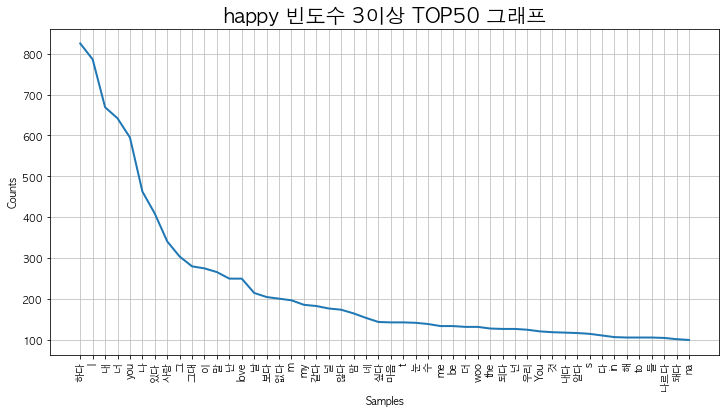

In [11]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("happy 빈도수 3이상 TOP50 그래프", size =20)
ko_h.plot(50)
plt.show()

In [12]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [13]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_h.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

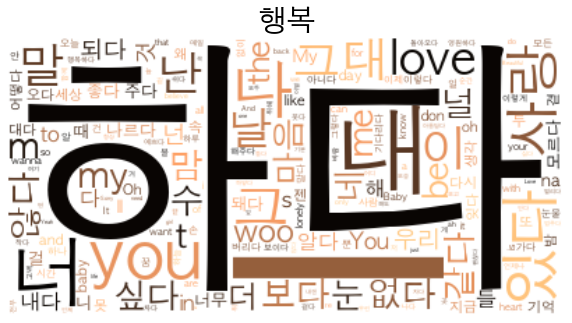

In [14]:
plt.figure(figsize=(10,8))
plt.title("행복", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()


### 추출한 happy 토큰 확인하기

In [15]:
# 동사 토큰
# print("동사토큰 : \n",list(ko_h.vocab()))
print(" => 동사 토큰 갯수 : ",len(list(ko_h.vocab())))

 => 동사 토큰 갯수 :  3024


In [16]:
token_happy = list(ko_h.vocab())

---
# sad

In [17]:
# 가사만 리스트에 넣기
sad_list = []
for i in range(170, 340):
    sad_list.append(train['가사'][i])

In [18]:
# 정규식 (특수문자 제거 작업)
lyric_text_sad = []
for i in range(0,170):
   lyric_text_sad.append(re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",sad_list[i],count=1,flags=0))
len(lyric_text_sad)

170

In [19]:
# lyric_text_sad

In [20]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = lyric_text_sad
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_s = (" ".join(r).strip())
    
    results2.append(rl_s)

In [21]:
token_s = str(results2).split(" ")
# token_s

In [22]:
# 불용어 추가
stop_words_sad = []
token_sad = [each_word for each_word in token_s if each_word not in stop_words_sad]


In [23]:
# 상위 100개 단어 확인
ko_s = nltk.Text(token_sad)
ko_s.vocab().most_common(500)

[('하다', 1081),
 ('너', 677),
 ('사랑', 603),
 ('내', 578),
 ('나', 419),
 ('있다', 382),
 ('그', 377),
 ('없다', 371),
 ('말', 316),
 ('보다', 314),
 ('날', 301),
 ('널', 291),
 ('그대', 261),
 ('난', 235),
 ('않다', 213),
 ('이', 207),
 ('수', 198),
 ('못', 180),
 ('같다', 172),
 ('싶다', 170),
 ('우리', 168),
 ('사람', 165),
 ('네', 165),
 ('아프다', 164),
 ('것', 158),
 ('다시', 150),
 ('더', 147),
 ('들', 142),
 ('걸', 137),
 ('너무', 128),
 ('잊다', 127),
 ('니', 124),
 ('모르다', 123),
 ('생각', 122),
 ('되다', 119),
 ('나르다', 119),
 ('그렇다', 119),
 ('또', 114),
 ('눈물', 112),
 ('맘', 112),
 ('오다', 112),
 ('마음', 110),
 ('내다', 107),
 ('시간', 107),
 ('다', 106),
 ('왜', 106),
 ('기억', 104),
 ('돼다', 101),
 ('알다', 101),
 ('좋다', 100),
 ('해', 96),
 ('어떻다', 96),
 ('나다', 96),
 ('해주다', 96),
 ('때', 93),
 ('만나다', 92),
 ('기다리다', 92),
 ('안', 91),
 ('하루', 89),
 ('아니다', 88),
 ('이렇게', 87),
 ('알', 86),
 ('떠나다', 85),
 ('가슴', 84),
 ('가다', 84),
 ('이제', 82),
 ('버리다', 81),
 ('웃다', 80),
 ('거', 77),
 ('혼자', 77),
 ('이다', 76),
 ('오늘', 75),
 ('보내다', 72),
 ('모든', 71),

In [24]:
len(ko_s.vocab())

2383

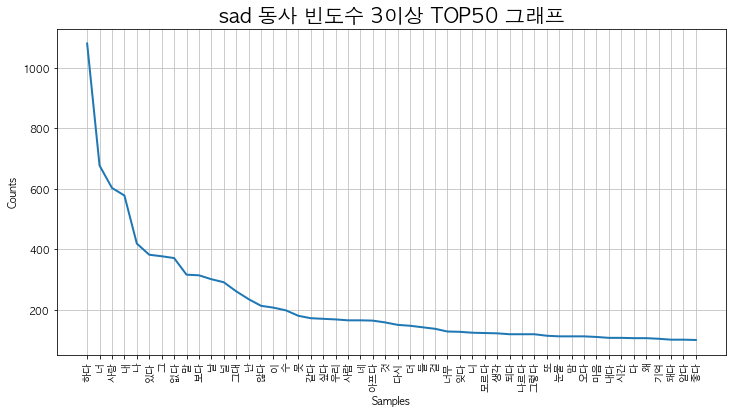

In [25]:
# sad 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("sad 동사 빈도수 3이상 TOP50 그래프", size =20)
ko_s.plot(50)
plt.show()

In [26]:
# #워드클라우드의 모양 설정. 동사이미지 가져오기
# import numpy as np
# from PIL import *
# cand_mask=np.array(Image.open('../../Data/image/동사2.png'))

In [27]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko_s.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

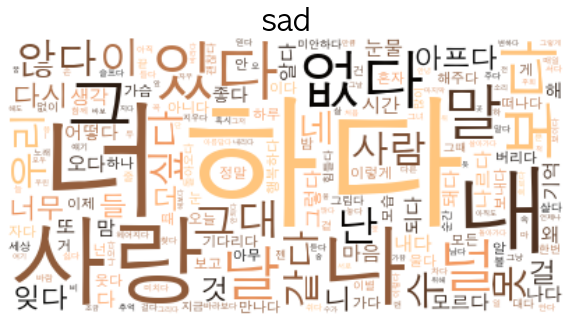

In [28]:
plt.figure(figsize=(10,8))
plt.title("sad", size =30, weight = 'bold')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 sad 토큰 확인하기

In [29]:
# sad 동사 토큰
# print("토큰 : \n",list(ko_s.vocab()))
print("=>토큰 갯수 : ",len(list(ko_s.vocab())))

=>토큰 갯수 :  2383


In [30]:
token_sad = list(ko_s.vocab())

---
# indifference

In [31]:
# 가사만 리스트에 넣기
indifference_list = []
for i in range(340, 510):
    indifference_list.append(train['가사'][i])

In [32]:
# 정규식 (특수문자 제거 작업)
lyric_text_indifference = []
for i in range(0,170):
   lyric_text_indifference.append(re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",indifference_list[i],count=1,flags=0))
len(lyric_text_indifference)

170

In [33]:
# lyric_text_indifference

In [34]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = lyric_text_indifference
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl_i = (" ".join(r).strip())
    
    results4.append(rl_i)

In [35]:
token_i = str(results4).split(" ")
# token_i

In [36]:
# 불용어 추가
stop_words_indifference = ["['먼"]
token_indifference = [each_word for each_word in token_i if each_word not in stop_words_indifference]


In [37]:
# 상위 100개 단어 확인
ko_i = nltk.Text(token_indifference)
ko_i.vocab().most_common(500)

[('하다', 630),
 ('그대', 536),
 ('내', 481),
 ('있다', 356),
 ('그', 351),
 ('나', 293),
 ('사랑', 280),
 ('들', 255),
 ('날', 253),
 ('이', 240),
 ('우리', 224),
 ('없다', 219),
 ('밤', 207),
 ('너', 201),
 ('수', 189),
 ('보다', 179),
 ('난', 175),
 ('같다', 159),
 ('오늘', 152),
 ('않다', 150),
 ('내다', 139),
 ('La', 133),
 ('기억', 131),
 ('오다', 127),
 ('눈', 126),
 ('더', 126),
 ('못', 123),
 ('마음', 121),
 ('것', 120),
 ('길', 120),
 ('가다', 118),
 ('되다', 116),
 ('곳', 115),
 ('때', 112),
 ('나르다', 111),
 ('다시', 110),
 ('꿈', 105),
 ('싶다', 101),
 ('저', 98),
 ('시간', 98),
 ('말', 97),
 ('손', 96),
 ('맘', 91),
 ('함께', 86),
 ('속', 86),
 ('또', 83),
 ('바람', 82),
 ('하늘', 80),
 ('대다', 80),
 ('그렇다', 79),
 ('만나다', 78),
 ('곁', 76),
 ('모습', 75),
 ('없이', 75),
 ('끝', 75),
 ('기다리다', 74),
 ('다', 73),
 ('찾다', 73),
 ('버리다', 73),
 ('아름답다', 71),
 ('노래', 70),
 ('나다', 65),
 ('내리다', 65),
 ('아', 65),
 ('추억', 64),
 ('안', 64),
 ('순간', 64),
 ('닿다', 64),
 ('걸', 63),
 ('꽃', 62),
 ('사람', 60),
 ('잊다', 60),
 ('곱다', 59),
 ('세상', 58),
 ('좋다', 58),
 ('눈물', 5

In [38]:
len(ko_i.vocab())

2608

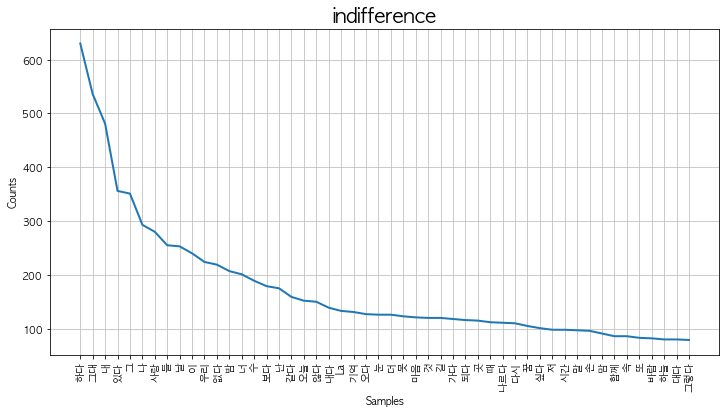

In [39]:
# indifference 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
plt.title("indifference", size =20)
ko_i.plot(50)
plt.show()

In [40]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko_i.vocab().most_common(300)

# 딕셔너리로 만들기
tmp_data4 = dict(data3)

wordcloud4 = WordCloud(
   background_color='White',
    colormap= 'copper', # 글씨색은 ('copper','ocean','summer')
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.3,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

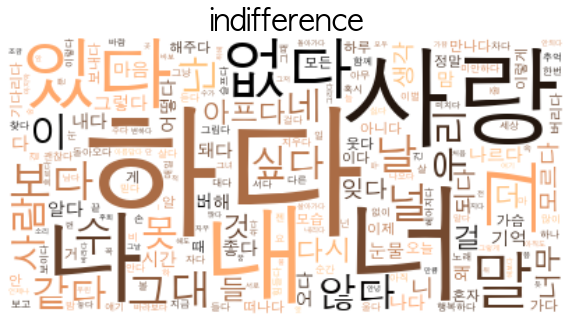

In [41]:
plt.figure(figsize=(10,8))
plt.title("indifference", size =30, weight = 'bold')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

### 추출한 indifference 토큰 확인하기

In [43]:

# print("토큰 : \n",list(ko_i.vocab()))
print(" =>토큰 갯수 : ",len(list(ko_i.vocab())))

 =>토큰 갯수 :  2608


In [44]:
token_indifference = list(ko_i.vocab())

---
# 벤다이어그램 시각화

In [45]:
# pip install venn

In [46]:
# 벤다이어 그램 설치 필요
%matplotlib inline

import venn

In [47]:
labels = venn.get_labels([
           set(token_happy), set(token_sad), set(token_indifference)
        ])
print(labels)


{'001': '959 ', '010': '688 ', '011': '301 ', '100': '1340 ', '101': '290 ', '110': '336 ', '111': '1058 '}


/Users/uyoung/miniforge3/envs/tensorflow/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((


In [48]:
import warnings
warnings.filterwarnings("ignore")

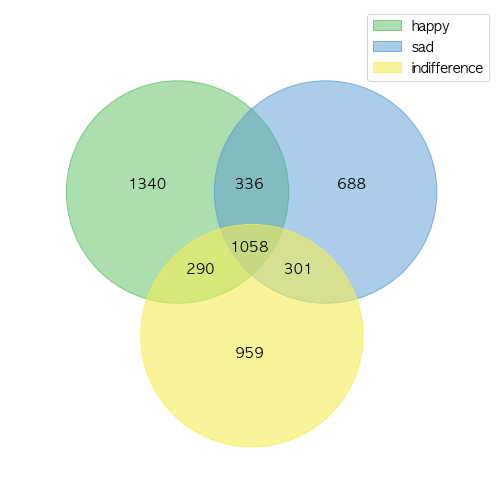

In [50]:
fig, ax = venn.venn4(labels, names=['happy', 'sad','indifference'])
fig.show()

In [51]:
# 벤다이어 그램에서 제거한 결과단어 확인하기
set1 = set(token_happy) - set(token_sad) - set(token_indifference)
set2 = set(token_sad) - set(token_indifference)- set(token_happy)
set3 = set(token_indifference)- set(token_happy) - set(token_sad)
print(len(set1),"\n",set(token_happy)-set1,"\n\n")
print(len(set2),"\n",set(token_sad)-set2,"\n\n")
print(len(set3),"\n",set(token_indifference)-set3,"\n\n")


1340 
 {'용다', '겁', '빌리다', '서두르다', '일으키다', '아직', '앞', '앉다', '모양', '두르다', '스며들다', '도착', '그대만', '가파른', '멀어지다', '어쩔', '들키다', '별빛', '피하', '통화', '맘속', '의미', 'ah', '어지르다', '숨기', '분명', 'live', '동안', '숨기다', '뎌', '반하다', '생각', '아득하다', 'I', '물', 'forget', '올리다', '다가가다', '촛불', '매', '억일', '끼다', '온통', '사뿐하다', '밀려오다', '귀', 'So', '감추다', '불다', '데', '타오르다', '소용', '야하다', 'hello', 'How', '소중하다', '안기다', '라라라', '안녕', '애', '항상', '글', '기다림', '널', '맨', 'If', '결국', '쳐다보다', '빨리', '요리', '외침', 's', '멋대로', 'i', '데리다', '있다', '쥐다', '하필', '걸치다', '펼쳐지다', '바로', 'promise', '오랫동안', '들어오다', '내려놓다', '태어나다', '특별하다', '이번', '거릴', '기', '초조하다', '맑은', '돌리다', 'play', '줄', '봄날', '요즘', '몇', '대답', '요가', '종이', '빠지다', 'give', '시원하다', '소린', '내게로', '착하다', '헤어지다', '땅', '괴롭다', '흘리다', '젠', '자리', '가야', '망설이다', '번째', '장미', '바라보다', '쯤', '까맣다', '놓다', '정신', '전화', '나오다', 'keep', '유일하다', '아름답다', '맘', '청', '들이다', '어깨', '자', '남자', "말다',", '어딨다', '갈래', '다투다', '희망', '흘러나오다', '쫓다', '세상', 'Hey', '바깥', '만남', '건지다', 'on', '실감', '거란', '머물다', '물들다', '크다', '지

### 중복 제거한 happy 1글자 이하 지우기

In [52]:
happy = list(set1)
# print(happy)

In [53]:
# 한글자 0 값 넣기
for i in range(len(happy)):
    if len(happy[i]) <= 1:
        happy[i] = 0
    else:
        happy[i] = happy[i]

In [54]:
# print(happy)

In [55]:
# 0 값 지우기
remove_set = {0}

happy = [i for i in happy if i not in remove_set]
len(happy)

1282

### 중복 제거한 sad 1글자 이하 지우기

In [56]:
sad = list(set2)
# print(sad)

In [57]:
# 한글자 0 값 넣기
for i in range(len(sad)):
    if len(sad[i]) <= 1:
        sad[i] = 0
    else:
        sad[i] = sad[i]
# print(sad)

In [58]:
# 0 값 지우기
remove_set = {0}

sad = [i for i in sad if i not in remove_set]
len(sad)

648

### 중복 제거한 indifference 1글자이하 지우기

In [59]:
indifference = list(set3)
# print(indifference)

In [60]:
# 한글자 0 값 넣기
for i in range(len(indifference)):
    if len(indifference[i]) <= 1:
        indifference[i] = 0
    else:
        indifference[i] = indifference[i]
# print(indifference)

In [61]:
# 0 값 지우기
remove_set = {0}

indifference = [i for i in indifference if i not in remove_set]
len(indifference)

886

# 토큰 합치기

In [47]:
len(happy)

NameError: name 'happy' is not defined

In [62]:
token_sum = happy + sad + indifference
print(len(token_sum))

2816


---
# 토큰 one hot
- 토큰을 동사와 명사의 현재형으로 저장했기 때문에 가사를 okt로 동사+명사로 전체 바꿔줘야함

In [63]:
from tensorflow import keras

In [64]:
# 가사만 리스트에 넣기
list = []
for i in range(0, 510):
    list.append(train['가사'][i])

In [65]:
# 정규식 (특수문자 제거 작업)
lyric= []
for i in range(0,510):
   lyric.append(re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",list[i],count=1,flags=0))
len(lyric)

510

In [66]:
# 가사 데이터 okt로 분류하기 
twitter = Okt() 
okt_result = []
lines = lyric
for line in lines:
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [67]:
# 분리가 잘 되었는지 확인하기
okt_result[0]

'잠시 길 잃다 어디 가야 하다 정말 알 수가 없다 난 늘 너 란 길 걸다 오 낮 괜찮다 바쁘다 지내다 수 있다 밤 오다 다시 길 잃다 울 울다 새벽 되다 모두 사라지다 my hope love sweet dreams 워 어떻다 해 워 잘해주다 말 왜 그렇다 이제 막 다른 길 워 보내다 싫다 네 눈 쳐다보다 너 너무 미안하다 하 도리어 내 더 미안하다 버리다 오 날 안다 네 품 차다 좋다 그리다 쉬다 떠나가다 거 면서 왜 널 좋아하다 만들다 모두 사라지다 my hope love sweet dreams 워 어떻다 해 워 마음 열다 말걸 후회 돼다 이 젠 막 다른 길 워 난 아이 보다 그저 온종일 울 기만 하다 네 없다 무엇 못 하다 어리광 부리 헤매다 뿐 잠시 길 잃다 my hope love sweet dreams 다시 길 찾다 끄다 my hope love sweet dreams 잠시 길 잃다 my hope love sweet dreams 다시 길 찾다 끄다 my hope love sweet dreams'

In [68]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [69]:
print((encoded[0]))

[2353, 2294, 0, 2643, 0, 0, 2701, 0, 2783, 0, 0, 2811, 1802, 0, 2744, 2701, 0, 2543, 2265, 0, 2197, 0, 2461, 2811, 0, 0, 2701, 0, 2098, 0, 695, 0, 2508, 0, 0, 0, 2643, 0, 2213, 2701, 0, 2671, 0, 0, 0, 0, 0, 2701, 0, 2459, 0, 2701, 0, 2780, 2772, 2701, 0, 2461, 0, 0, 2701, 0, 2511, 0, 2671, 2701, 0, 2701, 2294, 0, 2643, 0, 0, 2701, 0, 2506, 0, 2506, 2701, 0, 2645, 0, 0, 2700, 2701, 0, 2443, 2403, 0, 2795, 2468, 2780, 2701, 0, 2759, 1195, 0, 2287, 2319, 2419, 2207, 0, 2816, 2319, 869, 2207, 0, 2797, 2512, 2207, 2207, 2717, 0, 2502, 2388, 2207, 2352, 2759, 2797, 0, 1408, 0, 2783, 0, 2701, 0, 2589, 0, 1408, 0, 886, 2589, 2467, 2701, 0, 2265, 0, 1119, 0, 2743, 0, 2701, 0, 2781, 2082, 0, 1572, 0, 2701, 0, 0, 2643, 0, 1408, 0, 2785, 2772, 2701, 0, 1761, 2701, 0, 2738, 0, 2736, 0, 0, 2701, 2785, 2701, 0, 2508, 0, 2508, 2775, 0, 2608, 2126, 2744, 2701, 0, 2744, 0, 2618, 2621, 2783, 0, 2772, 0, 2479, 0, 2608, 2126, 2744, 2701, 0, 1642, 2621, 2701, 0, 2671, 0, 2726, 0, 2126, 2701, 0, 2738, 0, 227

---
# 전체 길이 padding작업

In [70]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 1924
가사의 최소 길이 : 180
가사의 평균 길이 : 559.194118


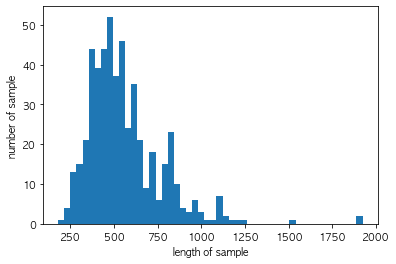

In [71]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [72]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[2353, 2294,    0, ...,    0,    0,    0],
       [2772,    0, 2611, ...,    0,    0,    0],
       [2435, 2329,    0, ...,    0,    0,    0],
       ...,
       [ 556,    0, 2701, ...,    0,    0,    0],
       [1752,    0, 2701, ...,    0,    0,    0],
       [2805, 2571,    0, ...,    0,    0,    0]], dtype=int32)

In [79]:
# print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

In [83]:
categories = train['감정'].to_list()

def category_encode(category):
    if category == 'happy':
        return [1,0,0]
    elif category == 'sad':
        return [0,1,0]
    else:
        return [0,0,1]

In [84]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1,

In [82]:
len(encoded_category)

510

---
# 가사 감정 RNN model

In [95]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [96]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [97]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [98]:
print(train_input.shape, val_input.shape)

(408, 1924) (82, 1924)


In [111]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length)) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128))

# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
# model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [122]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [113]:
import numpy as np

In [114]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [115]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [116]:
print(train_x.shape)
print(train_y.shape)

(408, 1924)
(408, 3)


In [117]:
print(val_x.shape)
print(val_y.shape)

(82, 1924)
(82, 3)


In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1924, 5)           65575     
                                                                 
 lstm_2 (LSTM)               (None, 128)               68608     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 142,634
Trainable params: 142,634
Non-trainable params: 0
_________________________________________________________________


In [119]:
history = model.fit(
    train_x,
    train_y,
    epochs=100,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
13/13 [==============================] - 14s 991ms/step - loss: 1.0998 - accuracy: 0.3186 - val_loss: 1.0982 - val_accuracy: 0.3780
Epoch 2/100
13/13 [==============================] - 12s 943ms/step - loss: 1.0989 - accuracy: 0.3382 - val_loss: 1.0980 - val_accuracy: 0.3902
Epoch 3/100
13/13 [==============================] - 12s 940ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3171
Epoch 4/100
13/13 [==============================] - 12s 937ms/step - loss: 1.0989 - accuracy: 0.3382 - val_loss: 1.0982 - val_accuracy: 0.3171
Epoch 5/100
13/13 [==============================] - 12s 962ms/step - loss: 1.0986 - accuracy: 0.3382 - val_loss: 1.0980 - val_accuracy: 0.3171
Epoch 6/100
13/13 [==============================] - 12s 963ms/step - loss: 1.0989 - accuracy: 0.3113 - val_loss: 1.0976 - val_accuracy: 0.3171
Epoch 7/100
13/13 [==============================] - 12s 947ms/step - loss: 1.0987 - accuracy: 0.3284 - val_loss: 1.0982 - val_accuracy:

In [123]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.3308333295583725
val_accuracy : 0.3528048688173294


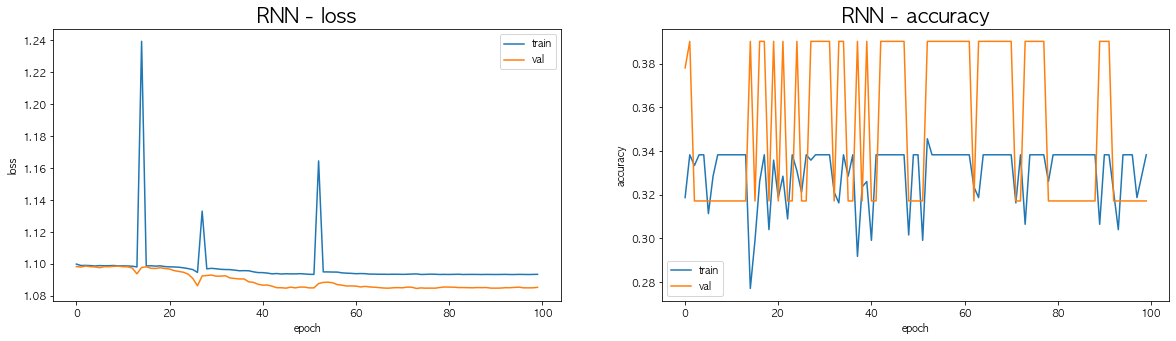

In [124]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()